In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


In [40]:

# 1. Veriyi Yükle ve Ayır
data = fetch_california_housing()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:

# 2. Scale Et
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Test setini de SADECE transform yapıyoruz!


In [14]:
x_train, x_test, y_train, y_test  = train_test_split(x,y ,test_size = 0.33, random_state = 0)

In [22]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

Y_train = sc.transform(pd.DataFrame(y_train))
Y_test = sc.transform(pd.DataFrame(y_test))


In [44]:
# 3. Modeli Eğit ve Tahmin Et
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [43]:

# 4. Sonuçları Değerlendir
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"R2 Score (0 ile 1 arası): {r2:.4f}")
print(f"RMSE (Ortalama Hata - 100k$ cinsinden): {rmse:.4f}")


R2 Score (0 ile 1 arası): 0.5758
RMSE (Ortalama Hata - 100k$ cinsinden): 0.7456


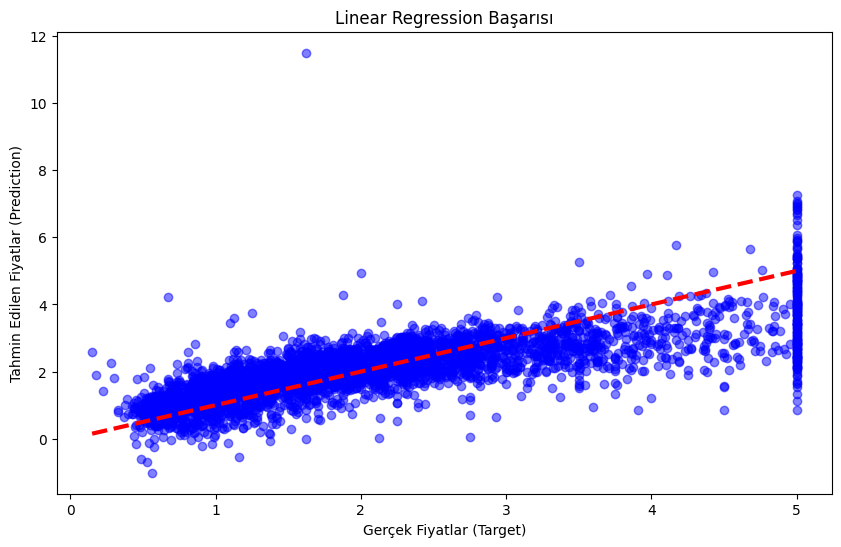

In [46]:

# 5. Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
# İdeal Durum Çizgisi (Kırmızı Çizgi)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3)
plt.xlabel('Gerçek Fiyatlar (Target)')
plt.ylabel('Tahmin Edilen Fiyatlar (Prediction)')
plt.title('Linear Regression Başarısı')
plt.show()

Veri temizliği ile modelin R2 Scorunu artırmaya çalışalım

In [57]:
# Sadece 'PRICE' sütunundaki aykırılara bakacağız, çünkü genelde en büyük bozulma buradadır.
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1

# Alt ve Üst Sınırları Belirle
# 1.5 katsayısı standarttır, daha katı temizlik için 1.0 veya daha gevşek için 2.0 yapılabilir.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı olmayanları filtrele
# PRICE değeri bu sınırların İÇİNDE olanları alıyoruz.
df_cleaned = df[(df['PRICE'] >= lower_bound) & (df['PRICE'] <= upper_bound)]

print("-" * 30)
print(f"Orijinal veri sayısı: {len(df)}")
print(f"Temizlenmiş veri sayısı: {len(df_cleaned)}")
print(f"Atılan aykırı veri sayısı: {len(df) - len(df_cleaned)}")
print("-" * 30)

# Temizlenmiş veriden X ve y'yi tekrar oluştur
X_clean = df_cleaned.drop('PRICE', axis=1).values
y_clean = df_cleaned['PRICE'].values

------------------------------
Orijinal veri sayısı: 20640
Temizlenmiş veri sayısı: 19569
Atılan aykırı veri sayısı: 1071
------------------------------


In [58]:
# 2. Train/Test Split (Artık temiz veri kullanıyoruz: X_clean, y_clean)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# 3. Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Eğitimi
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 5. Tahmin
y_pred = model.predict(X_test_scaled)

In [59]:
# 6. Metrikler (Sonuçları Kıyasla)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"YENİ R2 Score (Başarı Oranı): {r2:.4f}")
print(f"YENİ RMSE (Ortalama Hata): {rmse:.4f}")

YENİ R2 Score (Başarı Oranı): 0.6013
YENİ RMSE (Ortalama Hata): 0.6073


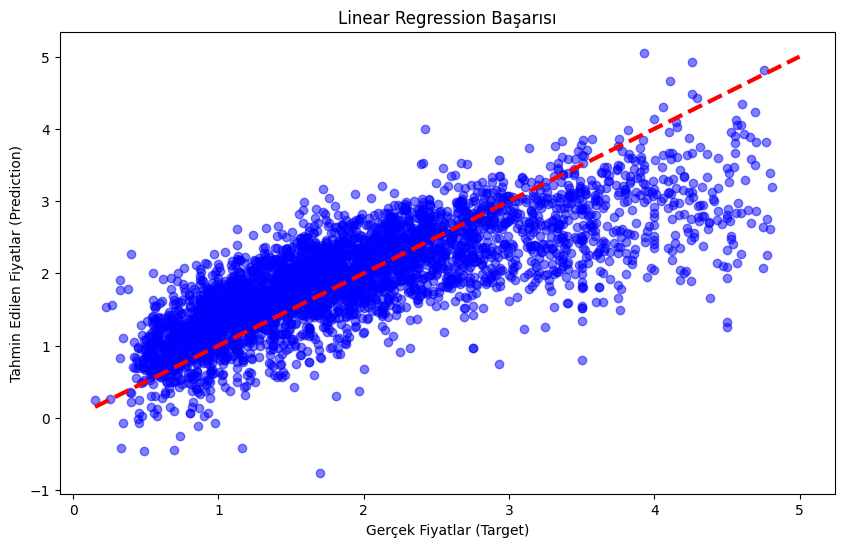

In [60]:
# 5. Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
# İdeal Durum Çizgisi (Kırmızı Çizgi)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3)
plt.xlabel('Gerçek Fiyatlar (Target)')
plt.ylabel('Tahmin Edilen Fiyatlar (Prediction)')
plt.title('Linear Regression Başarısı')
plt.show()